In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Toy Simulations

In [2]:
def solve_euler(dif_f, init, trange, step):
    sol = np.zeros((len(init), int((trange[1]-trange[0])//step) + (0 if (trange[1]-trange[0]) % step == 0 else 1)))
    sol[:,0] = init
    step_num = 0
    for k in np.arange(trange[0], trange[1]-step, step):
        sol[:, step_num+1] = sol[:, step_num] + step * dif_f(k, sol[:, step_num])
        step_num += 1
    return sol

def eval_solver(dif_f, sol, init, trange, t_step_range=[-7, 1.5], num_step_sizes=100):
    tsteps = []
    diffs = []
    for tstep in np.logspace(t_step_range[0], t_step_range[1], num_step_sizes):
        num_sol = solve_euler(dif_f, init, trange, tstep)
        print(f"done {tstep}")
        print(f"{num_sol.shape} {np.arange(trange[0], trange[1], tstep).shape}")
        acc_sol = np.array([sol(t) for t in np.arange(trange[0], trange[1], tstep)])
        avg_dif = np.average(np.abs(num_sol[0]-acc_sol)) 
        tsteps.append(tstep)
        diffs.append(avg_dif)
        
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Integration Time Step ∆t (s)")
    plt.ylabel("Average Error ∆x (m)")
    plt.plot(np.array(tsteps), np.array(diffs))

## Mass-Spring System

In [3]:
%%latex
Differential Equation: $$ \ddot{x}=-\frac{k}{m}x, x(0)=x_0 $$

Analytical Solution: $$ x(t)=x_0 \cos(\omega t) $$ where $\omega=\sqrt{\frac{k}{m}}$

<IPython.core.display.Latex object>

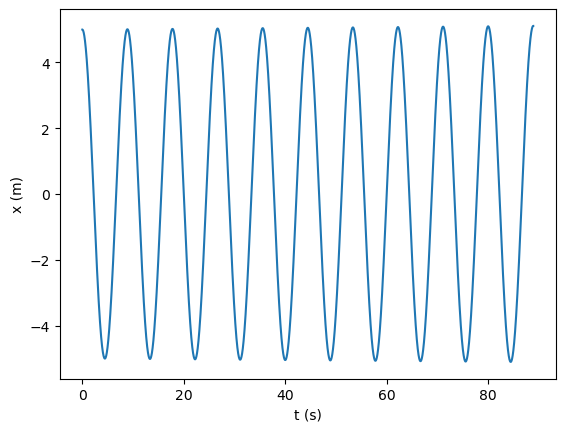

In [381]:
m = 10 # kg
k = 5 # kg/s^-2

def f(t, y):
    return np.array([y[1], -(k/m)*y[0]])

init = [5, 0]
def sol1(t):
    return 5*np.cos(np.sqrt(k/m)*t)

trange1 = [0, 10*2*np.pi*((m/k)**0.5)]
step1 = 0.001
sol = solve_euler(f, init, trange1, step1)

plt.plot(np.arange(trange1[0], trange1[1], step1), sol[0])
# plt.plot(trange1, sol1(trange1))
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()

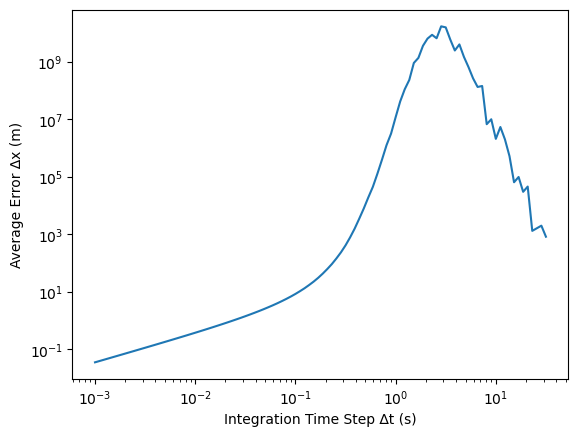

In [382]:
eval_solver(f, sol1, init, trange=trange1, t_step_range=[-3, 1.5])
plt.show()

## Two Coupled Masses System

In [383]:
%%latex
Differential Equations:
$$ \ddot{x_1} = -\frac{k_1}{m}x_1+\frac{k_2}{m}\left((x_2-x_1)-d\right), x_1(0)=x_{1,0} $$
$$ \ddot{x_2} = -\frac{k_2}{m}\left((x_2-x_1)-d\right)-\frac{k_1}{m}(x_2-d), x_2(0)=x_{2,0} $$
Analytic Solutions:
$$ x_1(t) = \frac{x_{1,0}+x_{2,0}}{2}\cos(\omega_1 t)+\frac{x_{1,0}-x_{2,0}}{2}\cos(\omega_2 t) $$
$$ x_2(t) = \frac{x_{1,0}+x_{2,0}}{2}\cos(\omega_1 t)-\frac{x_{1,0}-x_{2,0}}{2}\cos(\omega_2 t) $$
where $\omega_1=\sqrt{\frac{k_1}{m}}$ and $\omega_2=\sqrt{\frac{k_1+2k_2}{m}}$. If $x_2(0)=0$, we can write $x_1(t)$ as
$$ x_1(t)=x_{1,0}cos\left(\frac{\omega_1+\omega_2}{2}t\right)cos\left(\frac{\omega_1-\omega_2}{2}t\right)$$


<IPython.core.display.Latex object>

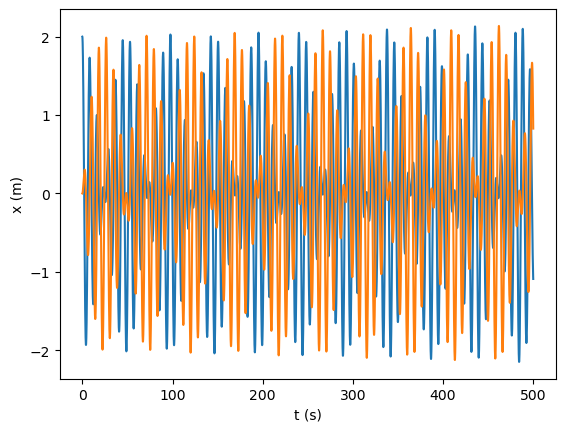

In [414]:
m = 10
k1 = 5
k2 = 1
d = 0 # doesn't affect much

omega1 = (k1/m) ** 0.5
omega2 = ((k1+2*k2)/m) ** 0.5

def f2(t, y):
    return np.array([
                        y[1],
                        -(k1/m)*y[0]-(k2/m)*(d-(y[2]-y[0])),
                        y[3],
                        (k2/m)*(d-(y[2]-y[0]))-(k1/m)*(y[2]-d)
                    ])

init2 = [2, 0, 0, 0]
def sol2(t):
    return ((init2[0]+init2[2])/2)*np.cos(omega1*t) + ((init2[0]-init2[2])/2)*np.cos(omega2*t)

trange2 = [0, 500]
step2 = 0.0005
num_sol2 = solve_euler(f2, init2, trange2, step2)

plt.plot(np.arange(trange2[0], trange2[1], step2), num_sol2[0])
plt.plot(np.arange(trange2[0], trange2[1], step2), num_sol2[2])
# plt.plot(num_sol2.t, sol2(num_sol2.t))
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()

done 0.001
(4, 500000) (500000,)
done 0.0013257113655901094
(4, 377157) (377157,)
done 0.0017575106248547913
(4, 284494) (284494,)
done 0.002329951810515372
(4, 214597) (214597,)
done 0.0030888435964774815
(4, 161873) (161873,)
done 0.004094915062380427
(4, 122103) (122103,)
done 0.005428675439323859
(4, 92104) (92104,)
done 0.0071968567300115215
(4, 69475) (69475,)
done 0.009540954763499945
(4, 52406) (52406,)
done 0.012648552168552958
(4, 39531) (39531,)
done 0.016768329368110083
(4, 29819) (29819,)
done 0.022229964825261943
(4, 22493) (22493,)
done 0.029470517025518096
(4, 16967) (16967,)
done 0.03906939937054617
(4, 12798) (12798,)
done 0.0517947467923121
(4, 9654) (9654,)
done 0.06866488450043001
(4, 7282) (7282,)
done 0.09102981779915217
(4, 5493) (5493,)
done 0.1206792640639329
(4, 4144) (4144,)
done 0.15998587196060574
(4, 3126) (3126,)
done 0.21209508879201905
(4, 2358) (2358,)
done 0.28117686979742307
(4, 1779) (1779,)
done 0.3727593720314938
(4, 1342) (1342,)
done 0.49417133

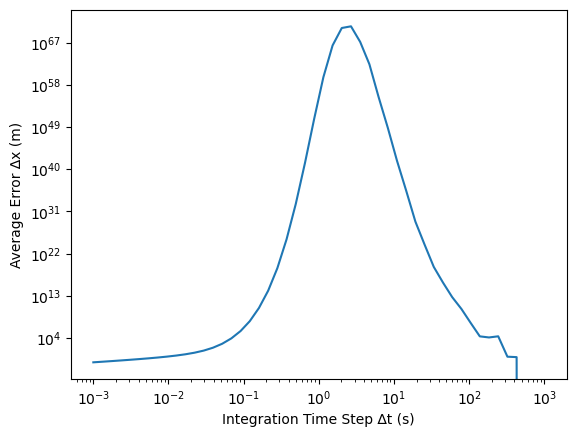

In [416]:
eval_solver(f2, sol2, init2, trange=trange2, t_step_range=[-3, 3], num_step_sizes=50)
plt.show()

# 1D Trap Simulation

### Equilibrium Starting positions
- 2 Ions: [-1.72273731e-6, 1.72273731e-06]
- 3 Ions: 

In [2]:
# physical constants
Z = 1
e = 1.60217883e-19
eps0 = 8.854187817e-12
M_Yb = 2.8733965e-25
nu = 2*np.pi*1e6

# dimensionless scale factors
l0 = ((Z*Z * e*e) / (4 * np.pi * eps0 * M_Yb * nu*nu)) ** (1/3)
m0 = M_Yb
t0 = 1 / nu

In [2]:
# Energy/Force calculation methods

# Energy + numerical gradient approach (true MD simulation)
def U(x):
    energy = sum([0.5 * M * (nu ** 2) * (x[i] ** 2) for i in range(len(x))])
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            energy += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x[i] - x[j]))
    return energy

def neg_grad_U(x, k, b=1, idx=0, dx=1e-8):
    x1 = np.copy(x)
    x1[k] = x[k] - dx
    x2 = np.copy(x)
    x2[k] = x[k] + dx
    return -(U(x2) - U(x1)) / (2*dx)

# Energy + numerical gradient with analytical simplfication approach
def U_k(x, k):
    energy = 0.5 * M * (nu ** 2) * (x[k] ** 2)
    for i in range(len(x)):
        if i != m:
            energy += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x[k] - x[i]))
    return energy

def neg_grad_Um(x, k, dx=1e-8):
    x1 = np.copy(x)
    x1[k] = x[k] - dx
    x2 = np.copy(x)
    x2[k] = x[k] + dx
    return -(U_k(x2, k) - U_k(x1, k)) / (2*dx)

# Analytic force calculation approach
def F_analytic(x, k, v=None, b=0):
    force = -M * ((nu ** 2) * x[k]) #  + b*v[k])
    for i in range(k):
        force += ((Z * Z * e * e) / (4*np.pi*eps0)) * ((1 / (x[k] - x[i])) ** 2)
    for i in range(k+1, len(x)):
        force -= ((Z * Z * e * e) / (4*np.pi*eps0)) * ((1 / (x[k] - x[i])) ** 2)
    return force

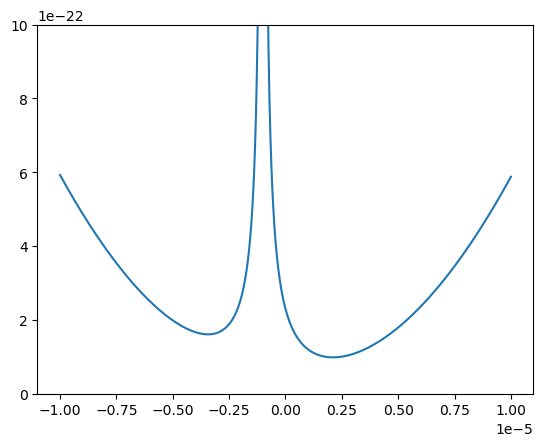

In [4]:
# plot potential energy
ion_pos = [-1e-6]
x_range = np.linspace(-1e-5, 1e-5, 1000)
U_range = 0.5 * M * (nu ** 2) * (x_range ** 2)
for x_ion in ion_pos:
    U_range += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x_range - x_ion))
plt.plot(x_range, U_range)
plt.ylim((0, 1e-21))
plt.show()

In [24]:
# Simulation methods

def sim_euler(x_0, v_0):
    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    x[0] = x_0; v[0] = v_0

    for i in range(n_tsteps):
        for k in range(N):
            F = neg_grad_U(x[i], k)
            a = F / M
            v[i+1,k] = v[i,k] + dt*a
            x[i+1,k] = x[i,k] + dt*v[i,k]

    return x, v

def sim_leapfrog(N, T, dt, M, x_0, v_0):
    n_tsteps = int(T / dt)

    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    vhalf = np.zeros((n_tsteps + 1, N))
    a = np.zeros((n_tsteps + 1, N))

    x[0] = x_0; v[0] = v_0
    for k in range(N):
        a[0,k] = F_analytic(x[0], k) / M # ion_trap.neg_grad_energy(x[0], k, dx=1e-9) / M

    for i in range(n_tsteps):
        for k in range(N):
            vhalf[i,k] = v[i,k] + 0.5*dt*a[i,k]
            x[i+1,k] = x[i,k] + dt*vhalf[i,k]
        for k in range(N):
            a[i+1,k] = F_analytic(x[i+1], k) / M # ion_trap.neg_grad_energy(x[i+1], k, dx=1e-9) / M
            v[i+1,k] = vhalf[i,k] + 0.5*dt*a[i+1,k]

    return x, v

In [31]:
# Dimensionless leapfrog simulation
def a_dless(x, k):
    a = -x[k]
    for i in range(k):
        a += 1 / ((x[i] - x[k]) ** 2)
    for i in range(k+1, len(x)):
        a -= 1 / ((x[i] - x[k]) ** 2)
    return a

def sim_leapfrog_dless(N, T, dt, x_0, v_0, input_dless=False, output_dless=False):
    T = T / t0
    dt = dt / t0
    if not input_dless:
        x_0 = np.array(x_0) / l0
        v_0 = np.array(v_0) / (l0 / t0)

    n_tsteps = int(T / dt)
    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    vhalf = np.zeros((n_tsteps + 1, N))
    a = np.zeros((n_tsteps + 1, N))

    x[0] = x_0; v[0] = v_0
    for k in range(N):
        a[0,k] = a_dless(x[0], k)

    for i in range(n_tsteps):
        for k in range(N):
            vhalf[i,k] = v[i,k] + 0.5*dt*a[i,k]
            x[i+1,k] = x[i,k] + dt*vhalf[i,k]
        for k in range(N):
            a[i+1,k] = a_dless(x[i+1], k)
            v[i+1,k] = vhalf[i,k] + 0.5*dt*a[i+1,k]

    if not output_dless:
        x = x * l0
        v = v * (l0 / t0)

    return x, v

In [6]:
import profile, pstats
from pstats import SortKey
from src import ion_trap

# profiling

# pr = profile.Profile()
# p = profile.run("sim_leapfrog(x_0=[-1e-5, -7e-6, -6e-6, -4e-6, -1e-6, 1e-6, 2e-6, 5e-6, 1.4e-5, 2e-5], v_0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])")
# ps = pstats.Stats(p)
# ps.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats()
# print(ps)

N = 9
T = 1e-4
dt = 1e-9

# 9 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(9, T, dt, M, [-0.5339*l, -0.3764*l, -0.2429*l, -0.1194*l, 0*l, 0.1194*l, 0.2429*l, 0.3764*l, 0.5339*l], [0, 0, 0, 0, 0, 0, 0, 0, 0])
x_sim, v_sim = ion_trap.sim_leapfrog_dless(9, T, dt, [-2.6803*l0*1.004, -1.8897*l0*1.004, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0], [0, 0, 0, 0, 0, 0, 0, 0, 0])

# 5 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(5, T, dt, M, x_0=[-0.6395*l, -0.3017*l, 0, 0.3017*l, 0.6395*l], v_0=[0, 0, 0, 0, 0])

# 4 ions
# x_sim, v_sim = sim_leapfrog(4, T, dt, M, x_0=[(-1.4368 + 0.5)*l, (-0.45438 - 0.5)*l, (0.45438-0.5)*l, (1.4368+0.5)*l], v_0=[0, 0, 0, 0])
# x_sim, v_sim = ion_trap.sim_leapfrog_dless(4, T, dt, x_0=[(-1.4368 + 0.25)*l0, (-0.45438 - 0.25)*l0, (0.45438-0.25)*l0, (1.4368+0.25)*l0], v_0=[0, 0, 0, 0])

# 3 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(3, T, dt, M, x_0=[-1.0772*l + 0.4082*l, 0 - 0.8165*l, 1.0772*l + 0.4082*l], v_0=[0, 0, 0])

# 2 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(2, T, dt, M, [-1e-6, 2e-6], [0, 0])

# x_sim, v_sim = sim_leapfrog([-1e-6, 3e-6], [0, 0])

x_sim = np.array(x_sim); v_sim = np.array(v_sim)

In [7]:
baseline_energy = ion_trap.total_energy([-2.6803*l0, -1.8897*l0, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0])
print(ion_trap.total_energy([-2.6803*l0*1.004, -1.8897*l0, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0]) - baseline_energy)
print(0.5 * 1.380649e-23 * 0.01)

2.9741275818265926e-26
6.903245e-26


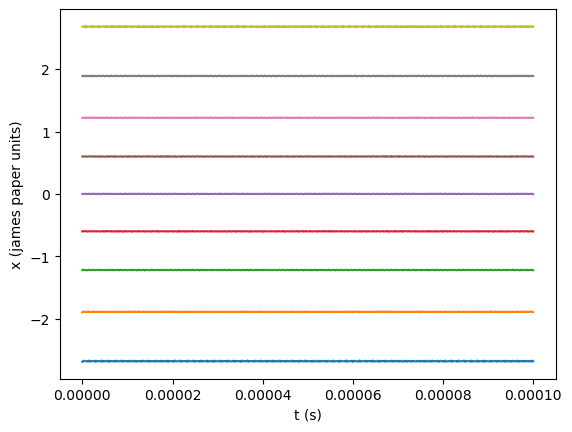

In [8]:
# Plot simulated ion trajectories
for i in range(N):
    plt.plot(np.linspace(0,T,int(T / dt)+1), x_sim[:,i] / l0)
plt.ylabel("x (james paper units)")
plt.xlabel("t (s)")
# plt.xlim((4.5e-5, 5.2e-5))
# plt.xlim((9.99e-5, 1e-4))
# plt.ylim((-3, -2))  
plt.show()

In [52]:
# al total energy
total_energy = np.array([(ion_trap.total_energy(x_sim[i]) + sum([0.5 * M_Yb * (v_sim[i][k] ** 2) for k in range(N)])) for i in range(int(T / dt) + 1)])

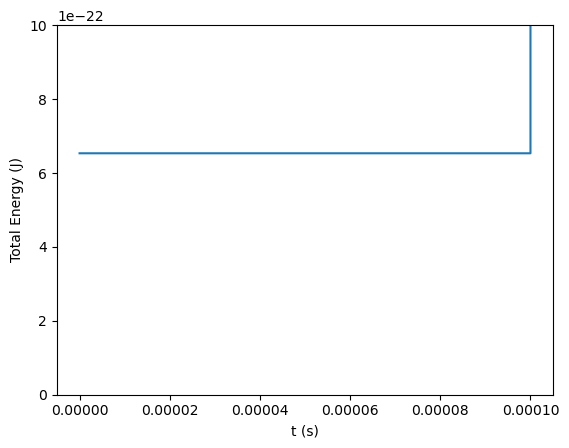

In [45]:
# plot total energy
plt.plot(np.linspace(0, T, int(T / dt)+1), total_energy)
# plt.xlim((0, 5e-6))
plt.ylim((0, 1e-21))
# plt.ylim((0, 1.0750e-19))
plt.xlabel("t (s)")
plt.ylabel("Total Energy (J)")
plt.show()

In [72]:
# change scale to compare with James (1998)
x_sim[-1,:] / l

array([-1.09659839, -0.06125018,  1.15784844])

In [124]:
# animation!
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(-3.5e-6, 3.5e-6), ylim=(-0.003, 0.003))
line, = ax.plot([], [], marker='o', linestyle='')

def init():
    line.set_data(x[0], np.zeros(N))
    return line,

def animate(i):
    line.set_data(x[i], np.zeros(N))
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=K, interval=2, blit=True)
plt.show()

NameError: name 'K' is not defined

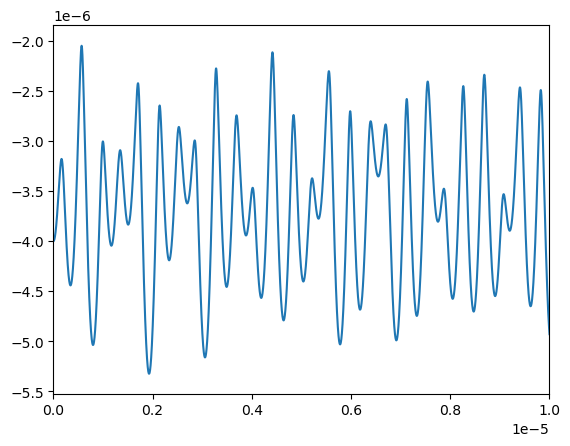

In [421]:
# plot single ion trajectory
plt.plot(np.linspace(0,T,n_tsteps+1), x_sim[:,0])
plt.xlim((0, 1e-5))
plt.show()

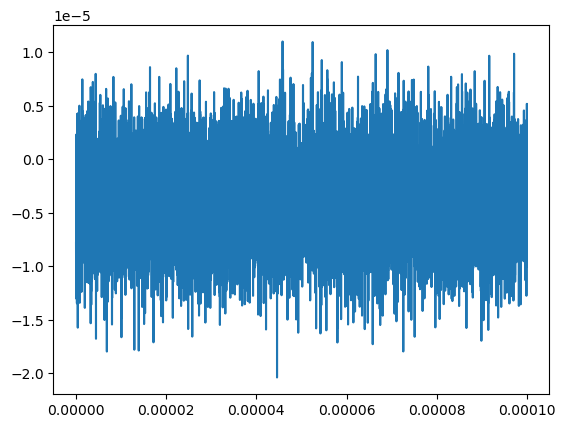

In [403]:
# add noise
x_noise = x_sim[:,0] + np.random.normal(0, 4e-6, size=(n_tsteps+1))
plt.plot(np.linspace(0,T,n_tsteps+1), x_noise)
plt.show()

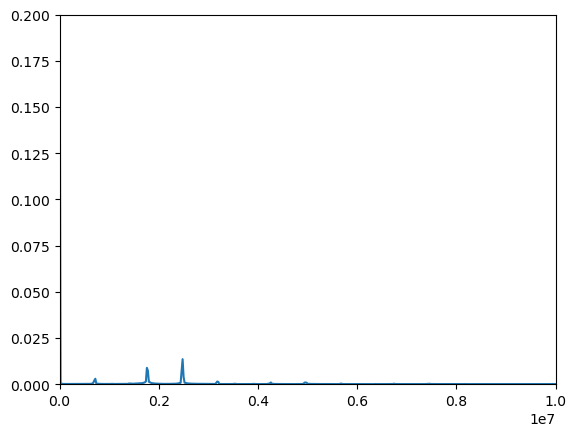

In [14]:
# Original Fourier Transform
from scipy.fft import rfft, rfftfreq, rfftn

# yf = np.abs(rfftn(x_sim[:,0]))
# xf = rfftfreq(int(T / dt), T/int(T/dt))
yf = np.abs(rfftn(x_sim[:50000,0]))
xf = rfftfreq(50000, T/int(T/dt))

plt.plot(xf, yf)
plt.xlim((0, 1e7))
plt.ylim((0, 0.2))
plt.show()

In [42]:
# extract frequencies and check eigenvalues
pairs = [(yf[i], xf[i]) for i in range(len(yf))]
pairs = sorted(pairs)
for p in pairs[-N-1:]:
    print(f"{p[1]} {((2*np.pi*p[1]) / nu) ** 2}")

1720000.0 2.9583999999999997
1760000.0 3.0976
1740000.0 3.0276
0.0 0.0


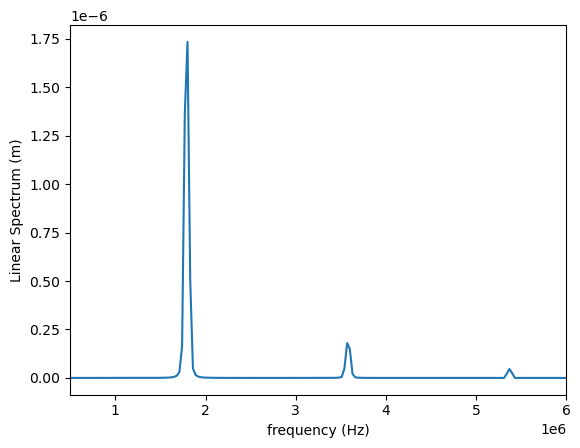

In [33]:
# FFT with windowing
from scipy.signal import welch, butter, sosfilt

# sos = butter(1e2, 1e5, fs=(1/dt), btype="highpass", output="sos")
# x_filt = sosfilt(sos, x_sim[:,0])
# plt.plot(np.linspace(0,T,n_tsteps+1), x_filt)

freq, Pxx_spec = welch(x_sim[:,0], fs=(1/dt), window="hann", scaling="spectrum", nperseg=(n_tsteps // 3))
lin_spec = Pxx_spec ** 0.5
plt.plot(freq, lin_spec)
plt.xlim((5e5, 6e6))
plt.xlabel("frequency (Hz)")
plt.ylabel("Linear Spectrum (m)")
plt.show()